In [1]:
import re
import jsonlines
from collections import Counter
from tqdm.notebook import tqdm
import pandas as pd
import seaborn

In [2]:
dataset = '../../data/wasabi/songs.jsonl'
print('reading data')
songs = list(iter(tqdm(iter(jsonlines.open(dataset)))))
print('done reading')
artists = Counter()
genres = Counter()
language = Counter()
songs_with_emotions = 0
songs_with_social_tags = 0
lyrics_char_lenghts = Counter()
lyrics_tok_lenghts = Counter()

print('Collecting stats')
for s in tqdm(songs):
    artists[s['artist']] += 1
    genres[s['genre']] += 1
    language[s['language']] += 1
    lyrics = s['lyrics']
    lyrics = re.sub('\n+', ' ', lyrics)
    lyrics_char_lenghts[len(lyrics)] += 1
    lyrics_tok_lenghts[len(lyrics.split(' '))] += 1
    songs_with_emotions += 1 if len(s['emotion_tags']) > 0 else 0
    songs_with_social_tags += 1 if len(s['social_tags']) > 0 else 0

reading data


0it [00:00, ?it/s]

done reading


  0%|          | 0/1429330 [00:00<?, ?it/s]

In [3]:
print(f'# Songs: {len(songs)}')
print(f'# Artists: {len(artists)}')
print(f'# Genres: {len(genres)}')
print(f'# Languages: {len(language)}')
print(f'# Songs with emotion tags: {songs_with_emotions}')
print(f'# Songs with social tags: {songs_with_social_tags}')
n_lyric_chars = sum(lyrics_char_lenghts.keys())
print(f'# Lyric Chars: {n_lyric_chars}')
print(f'MIN Lyric Chars: {min(lyrics_char_lenghts.keys()):.0f}')
print(f'AVG Lyric Chars: {n_lyric_chars/len(lyrics_char_lenghts):.0f}')
print(f'MAX Lyric Chars: {max(lyrics_char_lenghts.keys()):.0f}')
print(f'MODE Lyric Tokens: {lyrics_char_lenghts.most_common()[len(lyrics_char_lenghts.most_common())//2][0]}')
n_lyric_toks = sum(lyrics_tok_lenghts.keys())
print(f'# Lyric Tokens: {n_lyric_toks}')
print(f'MIN Lyric Tokens: {min(lyrics_tok_lenghts.keys()):.0f}')
print(f'AVG Lyric Tokens: {n_lyric_toks/len(lyrics_tok_lenghts):.0f}')
print(f'MAX Lyric Tokens: {max(lyrics_tok_lenghts.keys()):.0f}')
print(f'MODE Lyric Tokens: {lyrics_tok_lenghts.most_common()[len(lyrics_tok_lenghts.most_common())//2][0]}')


# Songs: 1429330
# Artists: 75847
# Genres: 520
# Languages: 99
# Songs with emotion tags: 53303
# Songs with social tags: 182263
# Lyric Chars: 24255659
MIN Lyric Chars: 51
AVG Lyric Chars: 3651
MAX Lyric Chars: 45350
MODE Lyric Tokens: 3391
# Lyric Tokens: 1640169
MIN Lyric Tokens: 20
AVG Lyric Tokens: 967
MAX Lyric Tokens: 9209
MODE Lyric Tokens: 860


In [4]:
top_genres = genres.most_common(20)
#top_genres = top_genres[1:]
x, y = zip(*top_genres)
data = {'genre':x, 'count': y}
data = pd.DataFrame.from_dict(data)
data
#seaborn.barplot(x='genre', y='count', data=data)


,genre,count
0,,725807
1,Rock,67477
2,Pop,59550
3,Country,34761
4,Hip Hop,33000
5,Alternative Rock,31823
6,Indie Rock,24975
7,Punk Rock,21314
8,Pop Rock,21061
9,Folk,18446


In [5]:
top_language = language.most_common(20)
#top_genres = top_genres[1:]
x, y = zip(*top_language)
data = {'language':x, 'count': y}
data = pd.DataFrame.from_dict(data)
data

,language,count
0,english,1076917
1,spanish,92764
2,german,46258
3,french,45244
4,italian,43112
5,portuguese,33445
6,finnish,12860
7,polish,12857
8,dutch,8368
9,swedish,7990


In [6]:
top_artists = artists.most_common(20)
#top_genres = top_genres[1:]
x, y = zip(*top_artists)
data = {'artist':x, 'count': y}
data = pd.DataFrame.from_dict(data)
data

,artist,count
0,Frank Sinatra,1284
1,Lil Wayne,978
2,Johnny Cash,952
3,George Jones,882
4,Ella Fitzgerald,802
5,Prince,764
6,Dolly Parton,757
7,Perry Como,756
8,Guided By Voices,740
9,Mina,731


     x     y
0  146  6594
1  152  6547
2  142  6529
3  156  6527
4  144  6527
5  148  6509
6  155  6498
7  153  6497
8  161  6490
9  154  6466


<AxesSubplot:xlabel='x', ylabel='y'>

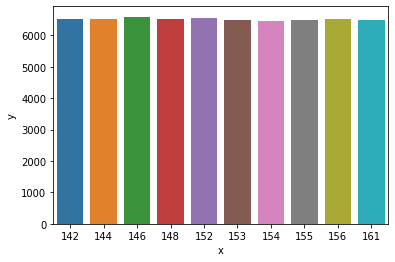

In [7]:
top_tok_lengths = lyrics_tok_lenghts.most_common(10)

x, y = zip(*top_tok_lengths)
data = {'x':x, 'y': y}
data = pd.DataFrame.from_dict(data)
print(data)
seaborn.barplot(x='x', y='y', data=data)